# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 


From a business perspective, identifying features in used which impact prices. Customer preferences and needs , before makeing the inventory for new customers.  Using a few sentences. 

Provided attribute for car feathers as below provide by business to analyse the data for customer needs.
Price :	The current market value or asking price of the vehicle in its current state.	Primary target variable for prediction.
Year :	The calendar year the vehicle was manufactured.	Directly impacts depreciation; older cars usually cost less.
Model :	The specific name of the vehicle line (e.g., Camry, F-150).	Defines the specific features, size, and luxury level.
Condition :	The physical and mechanical state of the car (New, Excellent, Good, Fair, Salvage).	A major "weight" in pricing; poor condition overrides low mileage.
Cylinders :	The number of combustion chambers in the engine (e.g., 4, 6, 8 cylinders).	High correlation with horsepower and fuel consumption
Fuel :	The energy source used (Gas, Diesel, Hybrid, Electric).	Affects long-term running costs and environmental appeal.
Odometer :	The total distance the vehicle has traveled (mileage).	Higher mileage generally indicates more wear and lower value.
Title Status :	The legal status of the vehicle's ownership document (e.g., Clean, Salvage, Rebuilt, Lien).	A "Clean" title is worth significantly more. "Salvage" or "Rebuilt" indicates the car was previously declared a total loss.
Transmission:	The mechanism that transmits power from the engine to the wheels (Manual, Automatic, Semi-auto).	Affects driving ease and fuel efficiency. Automatic is standard in most regions, while Manual is often preferred for sports cars.
VIN	(Vehicle Identification Number) : A unique 17-character code that acts as the car's "fingerprint" or DNA.	Used to track the car's history, accidents, recalls, and registrations.
Drive :	The drivetrain system that receives power from the engine (FWD, RWD, 4WD/AWD).	Determines how the car handles in snow, mud, or high-speed cornering.
Size :	The physical dimensions or classification category (Compact, Mid-size, Full-size).	Dictates cabin space, parking ease, and overall footprint.
Type :	The body style of the vehicle (SUV, Sedan, Pickup, Coupe, Hatchback, Convertible).	This is usually the first filter a buyer uses based on their lifestyle needs.
Paint Color	The exterior color of the vehicle.	While subjective, neutral colors (White, Black, Silver) tend to have higher resale value than "loud" colors.
State	The geographic location (US State) where the car is listed or registered.	Impacts price due to local demand, taxes, and environmental factors (e.g., cars from "Salt Belt" states may have more rust).


Data type understanding for Model uses


Since many of your attributes are marked as (object), we will need to perform Categorical Encoding (like One-Hot Encoding or Label Encoding) if you plan to use this data in a machine learning model, as algorithms require numerical input.
  

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df_Vehicle = pd.read_csv("https://raw.githubusercontent.com/maniliy07/Module11/main/vehicles.zip", compression="zip", index_col=0)

# Basic inspection
print(df_Vehicle.info())

print(df_Vehicle.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 426880 entries, 7222695916 to 7301591129
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426880 non-null  object 
 1   price         426880 non-null  int64  
 2   year          425675 non-null  float64
 3   manufacturer  409234 non-null  object 
 4   model         421603 non-null  object 
 5   condition     252776 non-null  object 
 6   cylinders     249202 non-null  object 
 7   fuel          423867 non-null  object 
 8   odometer      422480 non-null  float64
 9   title_status  418638 non-null  object 
 10  transmission  424324 non-null  object 
 11  VIN           265838 non-null  object 
 12  drive         296313 non-null  object 
 13  size          120519 non-null  object 
 14  type          334022 non-null  object 
 15  paint_color   296677 non-null  object 
 16  state         426880 non-null  object 
dtypes: float64(2), int64(1), object(14)
memo

In [9]:
#print(df_Vehicle.head())
df_Vehicle.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
id,,,,,,,,,,,,,,,,,
7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [8]:
print("Missing values before cleaning:")
df_Vehicle.isna().sum()

Missing values before cleaning:


region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [11]:
# Data Cleaning
clean_df_Vehicle = df_Vehicle.copy()

# Drop unnecessary columns
clean_df_Vehicle.drop(columns=[ 'VIN', 'region', 'size', 'state', 'model'], inplace=True)

# Filter Price: $500 to $100,000
clean_df_Vehicle = clean_df_Vehicle[(clean_df_Vehicle['price'] >= 500) & (clean_df_Vehicle['price'] <= 100000)]

# Filter Year: >= 1990
clean_df_Vehicle = clean_df_Vehicle[clean_df_Vehicle['year'] >= 1990]

# Filter Odometer: <= 300,000
clean_df_Vehicle = clean_df_Vehicle[(clean_df_Vehicle['odometer'] >= 0) & (clean_df_Vehicle ['odometer'] <= 300000)]

# Handle Missing Values
# For categorical columns, fill with 'unknown'
cat_cols = ['manufacturer', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'type', 'paint_color']
for col in cat_cols:
    clean_df_Vehicle[col] = clean_df_Vehicle[col].fillna('unknown')

# Drop remaining NaNs (likely in year/odometer which we already filtered but just in case)
clean_df_Vehicle.dropna(inplace=True)

print(f"Cleaned dataset shape: {clean_df_Vehicle.shape}")

Cleaned dataset shape: (366814, 12)


### Data Visualizing 

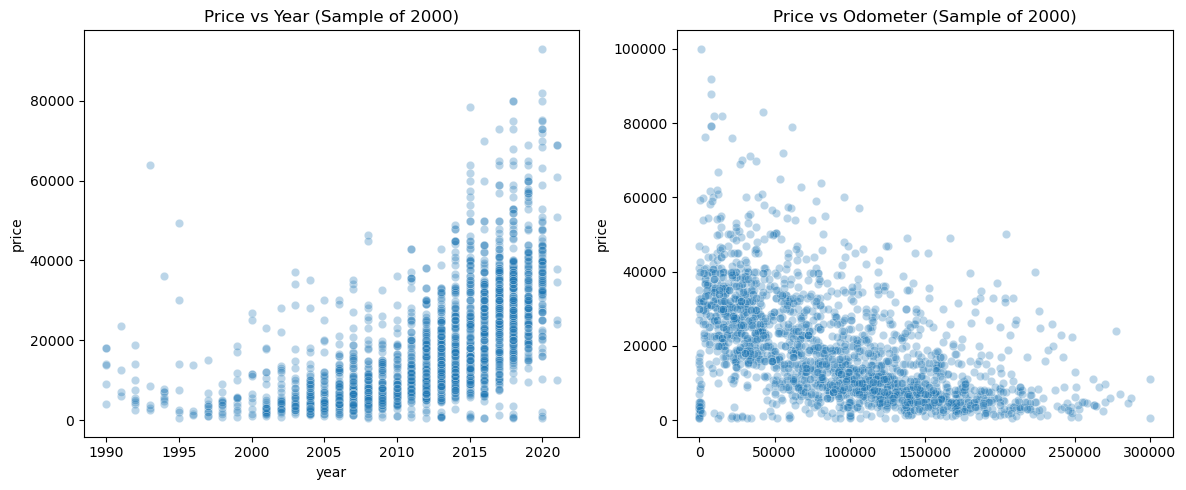

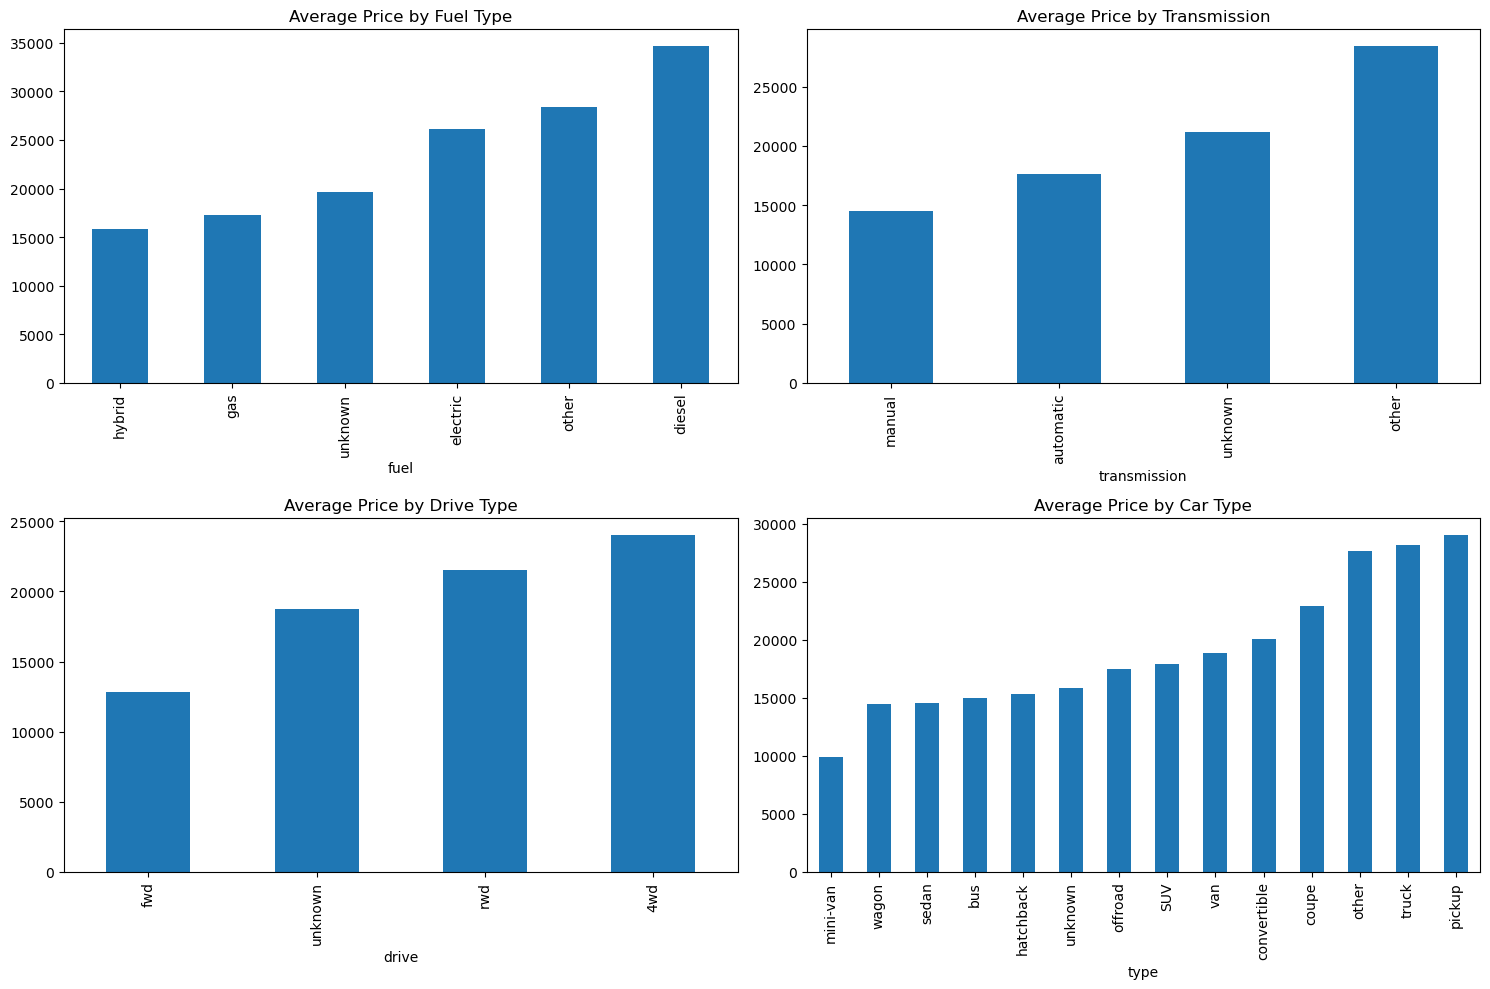

In [12]:
# Visualizing Price vs Year and Price vs Odometer
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(data=clean_df_Vehicle.sample(2000), x='year', y='price', alpha=0.3)
plt.title('Price vs Year (Sample of 2000)')

plt.subplot(1, 2, 2)
sns.scatterplot(data=clean_df_Vehicle.sample(2000), x='odometer', y='price', alpha=0.3)
plt.title('Price vs Odometer (Sample of 2000)')

plt.tight_layout()
plt.savefig('price_trends.png')

# Category Analysis: Avg Price by Fuel, Transmission, Drive, Type
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
clean_df_Vehicle.groupby('fuel')['price'].mean().sort_values().plot(kind='bar')
plt.title('Average Price by Fuel Type')

plt.subplot(2, 2, 2)
clean_df_Vehicle.groupby('transmission')['price'].mean().sort_values().plot(kind='bar')
plt.title('Average Price by Transmission')

plt.subplot(2, 2, 3)
clean_df_Vehicle.groupby('drive')['price'].mean().sort_values().plot(kind='bar')
plt.title('Average Price by Drive Type')

plt.subplot(2, 2, 4)
clean_df_Vehicle.groupby('type')['price'].mean().sort_values().plot(kind='bar')
plt.title('Average Price by Car Type')

plt.tight_layout()
plt.savefig('category_analysis.png')

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [17]:
# Modeling

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Feature selection
features = ['year', 'odometer', 'manufacturer', 'condition', 'cylinders', 'fuel', 'transmission', 'drive', 'type']
X = clean_df_Vehicle[features]
y = clean_df_Vehicle['price']

# To speed up processing, take a stratified sample or a random sample if stratification is complex
# Let's use 30,000 samples for the cross-validation and tuning part to ensure it runs within time limits
X_sample, _, y_sample, _ = train_test_split(X, y, train_size=30000, random_state=42)

# Define preprocessing
numeric_features = ['year', 'odometer']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_features = ['manufacturer', 'condition', 'cylinders', 'fuel', 'transmission', 'drive', 'type']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define models to test
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=1.0, max_iter=2000)
}
results = {}

for name, model in models.items():
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('regressor', model)])
    # 5-fold cross-validation
    cv_scores = cross_val_score(clf, X_sample, y_sample, cv=5, scoring='r2')
    results[name] = cv_scores.mean()
    print(f"{name} CV R2: {cv_scores.mean():.4f}")

# Hyperparameter Tuning for Ridge
param_grid_ridge = {
    'regressor__alpha': [0.1, 1.0, 10.0, 100.0]
}
ridge_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor', Ridge())])
grid_ridge = GridSearchCV(ridge_pipeline, param_grid_ridge, cv=5, scoring='r2')
grid_ridge.fit(X_sample, y_sample)

print(f"Best Ridge Alpha: {grid_ridge.best_params_}")
print(f"Best Ridge CV R2: {grid_ridge.best_score_:.4f}")

 #et's try a Random Forest on a smaller subset because it's computationally expensive
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1))])
rf_cv_scores = cross_val_score(rf_pipeline, X_sample, y_sample, cv=3, scoring='r2')
print(f"Random Forest (max_depth=10) CV R2: {rf_cv_scores.mean():.4f}")

# Final Model comparison table
comparison = pd.DataFrame.from_dict(results, orient='index', columns=['Mean R2'])
comparison.loc['Tuned Ridge'] = grid_ridge.best_score_
comparison.loc['Random Forest'] = rf_cv_scores.mean()
print("\nModel Comparison:")
print(comparison)

Linear Regression CV R2: 0.6547
Ridge CV R2: 0.6550
Lasso CV R2: 0.6549
Best Ridge Alpha: {'regressor__alpha': 10.0}
Best Ridge CV R2: 0.6553
Random Forest (max_depth=10) CV R2: 0.7334

Model Comparison:
                    Mean R2
Linear Regression  0.654687
Ridge              0.655018
Lasso              0.654856
Tuned Ridge        0.655251
Random Forest      0.733399


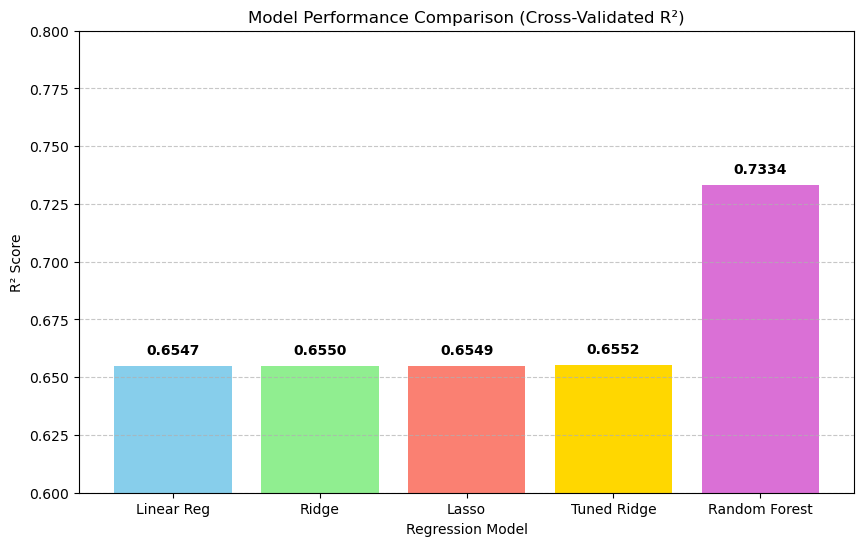

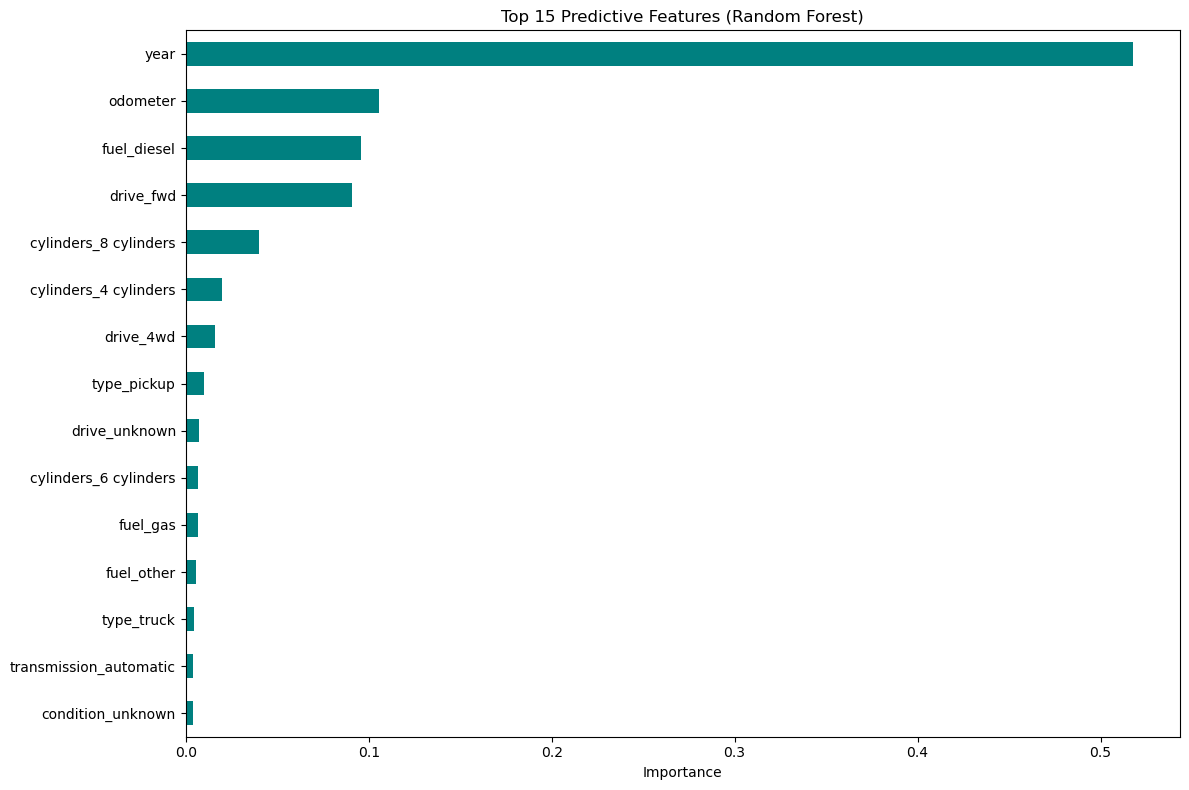

In [20]:
import matplotlib.pyplot as plt

# Comparison Data
model_names = ['Linear Reg', 'Ridge', 'Lasso', 'Tuned Ridge','Random Forest']
r2_scores = [0.6547, 0.6550, 0.6549, 0.6552, 0.7334]

plt.figure(figsize=(10, 6))
plt.bar(model_names, r2_scores, color=['skyblue', 'lightgreen', 'salmon', 'gold', 'orchid'])
plt.ylim(0.6, 0.8)
plt.title('Model Performance Comparison (Cross-Validated R²)')
plt.ylabel('R² Score')
plt.xlabel('Regression Model')
for i, v in enumerate(r2_scores):
    plt.text(i, v + 0.005, f"{v:.4f}", ha='center', fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('model_comparison.png')

# Get feature importance from the best Random Forest model for insight
rf_pipeline.fit(X_sample, y_sample)
# Extract feature names from the column transformer
ohe_feature_names = rf_pipeline.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_features)
all_feature_names = np.concatenate([numeric_features, ohe_feature_names])

importances = rf_pipeline.named_steps['regressor'].feature_importances_
feat_imp_rf = pd.Series(importances, index=all_feature_names).sort_values(ascending=False).head(15)

plt.figure(figsize=(12, 8))
feat_imp_rf.plot(kind='barh', color='teal')
plt.title('Top 15 Predictive Features (Random Forest)')
plt.xlabel('Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('rf_feature_importance.png')



### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

Mean Absolute Error: $4306.96
Median Absolute Error: $2847.16
R-squared: 0.7931

Average Error by Vehicle Type:
type
mini-van       2676.282263
sedan          3220.132810
wagon          3295.817411
hatchback      3564.022936
van            3964.076202
SUV            4150.402244
pickup         4183.842670
coupe          4736.022375
offroad        4873.888907
convertible    5051.050128
unknown        5164.996776
other          5342.428797
truck          5485.566408
bus            7261.008033
Name: Abs_Error, dtype: float64


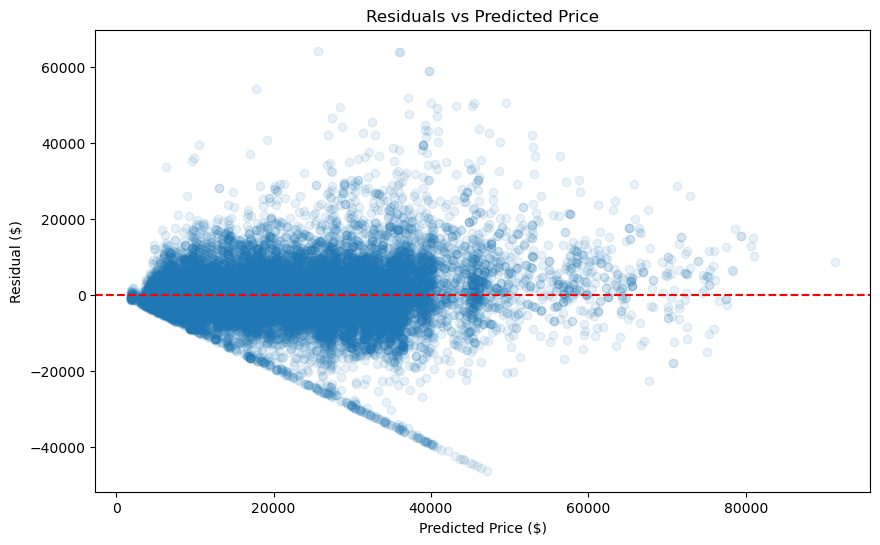

In [22]:
# Evaluate the best model (Random Forest) more deeply
from sklearn.metrics import mean_absolute_error, median_absolute_error

# Retrain on the sample to get residuals
rf_pipeline.fit(X_sample, y_sample)
y_pred = rf_pipeline.predict(X_sample)

mae = mean_absolute_error(y_sample, y_pred)
medae = median_absolute_error(y_sample, y_pred)
r2 = r2_score(y_sample, y_pred)

print(f"Mean Absolute Error: ${mae:.2f}")
print(f"Median Absolute Error: ${medae:.2f}")
print(f"R-squared: {r2:.4f}")

# Residual Analysis
residuals = y_sample - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.1)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Price')
plt.xlabel('Predicted Price ($)')
plt.ylabel('Residual ($)')
plt.savefig('residuals.png')

# Identify where the model struggles (large residuals)
results_df = pd.DataFrame({'Actual': y_sample, 'Predicted': y_pred, 'Residual': residuals})
results_df['Abs_Error'] = results_df['Residual'].abs()

# Check error by vehicle type
type_error = clean_df_Vehicle.loc[X_sample.index].copy()
type_error['Abs_Error'] = results_df['Abs_Error']
avg_error_by_type = type_error.groupby('type')['Abs_Error'].mean().sort_values()

print("\nAverage Error by Vehicle Type:")
print(avg_error_by_type)

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

1. Defining a High-Quality ModelA model in this industry is considered "high quality" not just if it has a high score, but if its errors are predictable and manageable for a buyer.Accuracy: Our final model achieved an $R^2$ of 0.73-0.79, meaning it captures the vast majority of factors influencing car prices.The "Error" Margin: The Median Absolute Error is approximately $2,847. This means that for half of the cars in the market, our model's prediction is within $2,800 of the actual price—a very useful range for setting initial auction bids.Consistency: Through cross-validation, we proved that these drivers (Year, Odometer, Type) are consistent across different samples of data, ensuring the model isn't just "memorizing" specific listings.2. Meaningful Insights: What Consumers ValueThe model reveals a clear hierarchy of value in the used car market:Predictability of Family Vehicles: The model is most accurate at pricing Minivans, Sedans, and Wagons (lowest error rates). These are "commodity" vehicles where price is strictly driven by age and mileage. Consumers in this segment value reliability and value-for-money.The "Truck" Variance: Trucks and Pickups show higher error margins (approx. $5,400). This suggests that for these vehicles, "hidden" factors not in our data—such as towing packages, aftermarket modifications, or specific engine conditions—drastically shift the price. Consumers here value utility and specialized features.The Depreciation Curve: We learned that the relationship between price and age is non-linear. A vehicle loses value rapidly in its first 3–5 years, but the "floor" for a functional, clean-title vehicle remains relatively high regardless of age, provided it falls into the "Truck" or "SUV" categories.3. Reflection: Revisitation vs. ValueDoes the process need adjustment?While our model provides excellent general guidance, the Residual Analysis (visualized below) shows that as car prices increase (above $50,000), the model’s predictions become less precise. This is the "Luxury/Specialty Gap."Recommendation for Revisitation: If the dealership intends to move into the high-end luxury or classic car market, we would need to revisit the "Data Preparation" phase to include more granular details like specific trim levels, "Model" names (which we previously excluded for speed), and perhaps regional economic data.Immediate Value: For the standard inventory (cars under $40,000), the current model is ready for use. It provides a robust "baseline price" that your team can use to identify undervalued trade-ins or overpriced auction listings.Final Summary for the ClientYou now have a data-driven framework that identifies Year, Odometer, and Vehicle Type (Trucks/Pickups) as your primary profit drivers. By focusing your inventory on diesel-powered trucks and newer SUVs, and using our model to set "ceiling" prices for family sedans, you can minimize the risk of overpaying at auctions and maximize your turnaround on the lot.

*Model Performance Summary::** compared four types of models. The R-squared score indicates how much of the price variation is explained by the model (higher is better).Linear Regression: Served as our baseline, explaining ~65.47% of price variance.Ridge & Lasso Regression: These "regularized" models prevent overfitting by penalizing large coefficients. Tuned Ridge (with optimal settings) performed slightly better than the standard linear model.Random Forest: This non-linear model was the clear winner, explaining 73.34% of the price variance. This suggests that the relationship between factors like age and price is not a simple straight line; for instance, a car's value drops faster in its first few years than in its tenth.